# Usage of Dataset class, the CO molecule as example

In this tutorial, the basics of the `Dataset` class are briefly reviewed in a convergence study of the CO molecule, before presenting an example of application where the polarizability tensor $\alpha$ is computed. It is advised to have done the [tutorial](./CH4.ipynb) on the methane molecule before in order to be familiar with the fundamentals of `Dataset` calculations. 

In [145]:
from BigDFT import Datasets as D
from BigDFT import Calculators as C
from BigDFT import Inputfiles as I
import numpy as np
import matplotlib.pyplot as plt

## Convergence of the ground state of the CO molecule

In this example, the convergence analysis of the Ground State (GS) energy of the CO molecule is performed with respect to the size of the simulation domain. 

First, we instantiate both the calculator and the Dataset objects.

In [146]:
calc = C.SystemCalculator(omp=2,mpi_run='mpirun -np 4',skip=True,verbose=False)
study = D.Dataset(label='CO',run_dir='conv-CO',posinp='CO_posinp.xyz',molecule_shape='linear')

The object `study` is characterized by its label 'CO_GS' and contains the path `run_dir` in which all the calculations of the dataset will be performed. The variable `molecule_shape` has been introduced to show how further information can be passed to the dataset instances. For reminder, global options can be extracted as follows

In [147]:
print(study.global_options())

{'label': 'CO', 'run_dir': 'conv-CO', 'posinp': 'CO_posinp.xyz', 'molecule_shape': 'linear'}


Next, the input file is created while essential computational parameters are provided.

In [148]:
# Define the default parameters of the input file
inp = I.Inputfile()
inp.set_hgrid(0.37)
inp.set_scf_convergence(gnrm=1.0e-5)

The convergence analysis will be performed on the values of rmult.

We prepare the study for the convergence analysis by appending the run associated to the values of rmult. Each run is characterized by an `id` and contains the `InputFile` object as input as well as the runner used to perform the calculation. If the same `id` is provided more than once, the function gives a `Value Error`.

In [149]:
rmult = [5.0,6.0,7.0,8.0]

for r in rmult:
    inp.set_rmult(coarse=r,fine=9.0)
    study.append_run(id={'rmult':r},runner=calc,input=inp)

The following member of the `Dataset` class shows how to refer to the various calculation of `study`.

In [150]:
print(study.calculators)
print(study.ids)

[{'calc': <BigDFT.Calculators.SystemCalculator object at 0x7fab00f522d0>, 'runs': [0, 1, 2, 3]}]
[{'rmult': 5.0}, {'rmult': 6.0}, {'rmult': 7.0}, {'rmult': 8.0}]


A particular instance is accessed by

In [151]:
print(study.ids[2])
print(study.runs[2])

{'rmult': 7.0}
{'label': 'CO', 'run_dir': 'conv-CO', 'posinp': 'CO_posinp.xyz', 'molecule_shape': 'linear', 'input': {'dft': {'hgrids': 0.37, 'gnrm_cv': 1e-05, 'rmult': [7.0, 9.0]}, 'lin_general': {'rpnrm_cv': 'default'}, 'mix': {'rpnrm_cv': 'default'}}}


`study.names` contains a list of strings with the ids of the run. May be useful for labelling.

In [152]:
study.names

['rmult__5.0', 'rmult__6.0', 'rmult__7.0', 'rmult__8.0']

The appended simulation can be executed with the run method. The `skip=True` in the runner instance guarantees that computation already performed are not executed again.

In [153]:
study.run()

 <BigDFT> Run already performed, found final file: forces_rmult__5.0.xyz
 <BigDFT> Run already performed, found final file: forces_rmult__5.0.xyz
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 13.240 MB
 Walltime since initialization:  00:00:00.002416237
 Max No. of dictionaries used:  1127 #( 1052 still in use)
 Number of dictionary folders allocated:  1
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 13.172 MB
 Walltime since initialization:  00:00:00.002035260
 Max No. of dictionaries used:  1127 #( 1052 still in use)
 Number of dictionary folders allocated:  1
 <BigDFT> Run already 

{0: <BigDFT.Logfiles.Logfile at 0x7fab096d15d0>,
 1: <BigDFT.Logfiles.Logfile at 0x7fab00f01e10>,
 2: <BigDFT.Logfiles.Logfile at 0x7fab0946c290>,
 3: <BigDFT.Logfiles.Logfile at 0x7fab00ec2fd0>}

### Analyzing the dataset output

The class member `study.results` contains a dictionary with the logfiles of the computations performed by the run method, returned in the order of which the `append_run` was performed.

In [154]:
results = study.results

Several operation can be performed on the results by using the methods of the `Logfile` class. 

For example, the total energy w.r.t. the domain size is obtained as

5.0 -21.661153985020135 rmult__5.0
6.0 -21.66134584205134 rmult__6.0
7.0 -21.6613579335895 rmult__7.0
8.0 -21.661359464443258 rmult__8.0


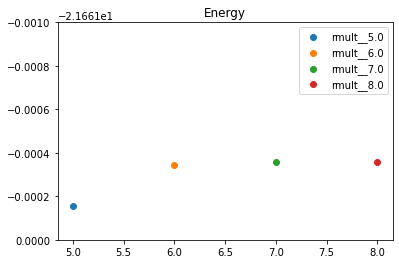

In [155]:
for ci in study.calculators[0]['runs']:
    print(study.ids[ci]['rmult'],results[ci].energy,study.names[ci])
    plt.scatter(study.ids[ci]['rmult'],results[ci].energy,label=study.names[ci])
plt.legend()
plt.title('Energy',size=12)
plt.ylim(-21.661,-21.662)
plt.show()

Other useful quantities can be extract using the methods of the `Logfile` class, for instance

In [156]:
print(results[0].dipole)
print(results[0].evals[0][0])
print(results[0].log['dft']['rmult'])
print(results[0].log['Electric Dipole Moment (AU)'])

[-0.0002296574, -0.0002296574, 0.09288163]
[-1.07897861 -0.5212773  -0.44461433 -0.44461428 -0.33423529]
[5.0, 9.0]
{'P vector': [-0.0002296574, -0.0002296574, 0.09288163], 'norm(P)': 0.0928822004}


<AxesSubplot:xlabel='Energy [eV]', ylabel='DoS'>

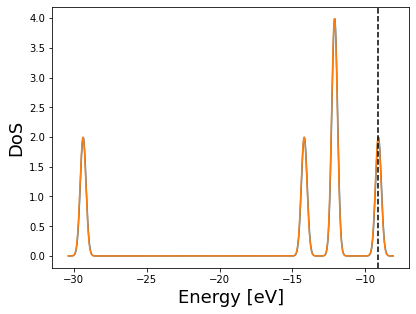

In [157]:
dos = results[0].get_dos(label=study.names[0])
dos.append_from_bandarray(results[2].evals,label=study.names[2])
dos.plot(sigma=0.2)

Alternatively, results associated to specific id and/or attribute can be extracted as follows:

In [158]:
study.fetch_results()

If an attribute and/or an id is provided, `fetch_results` extracts only the wanted results, for instance

In [159]:
print(study.fetch_results(attribute='energy'))
print(study.fetch_results({'rmult': 8.0},attribute='energy'))

[-21.661153985020135, -21.66134584205134, -21.6613579335895, -21.661359464443258]
[-21.661359464443258]


### Post processing analysis

It is also possible to define a post-processing function that is passed to the `Dataset` instance. This function
is called after the run and the output of `study.run` and contains the output of the post-processing function.
We show some examples.

1) Extraction of the ground state dipole

In [160]:
def get_dipole(dataset):
    dipole = dataset.fetch_results(attribute='dipole')
    return dipole

study.set_postprocessing_function(get_dipole)

In [161]:
dipole_GS = study.run();

 <BigDFT> Run already performed, found final file: forces_rmult__5.0.xyz
 <BigDFT> Run already performed, found final file: forces_rmult__5.0.xyz
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 13.188 MB
 Walltime since initialization:  00:00:00.002320176
 Max No. of dictionaries used:  1127 #( 1052 still in use)
 Number of dictionary folders allocated:  1
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 13.116 MB
 Walltime since initialization:  00:00:00.001857607
 Max No. of dictionaries used:  1127 #( 1052 still in use)
 Number of dictionary folders allocated:  1
 <BigDFT> Run already 

In [162]:
dipole_GS

[[-0.0002296574, -0.0002296574, 0.09288163],
 [-3.391146e-05, -3.391146e-05, 0.09150228],
 [-2.716707e-06, -2.716707e-06, 0.09138863],
 [-1.027985e-05, -1.027985e-05, 0.09137423]]

2) Extraction of the box size

In [163]:
def get_size(dataset): # how to do def get_size(study,unit)
    sizes = []
    results = dataset.fetch_results()
    for calc,res in enumerate(results):
        sizes.append(res.log['Sizes of the simulation domain']['AU'])
    return sizes

study.set_postprocessing_function(get_size)

In [164]:
boxsize = study.run();

 <BigDFT> Run already performed, found final file: forces_rmult__5.0.xyz
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 13.096 MB
 Walltime since initialization:  00:00:00.001892042
 Max No. of dictionaries used:  1127 #( 1052 still in use)
 Number of dictionary folders allocated:  1
 <BigDFT> Run already performed, found final file: forces_rmult__5.0.xyz
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 12.912 MB
 Walltime since initialization:  00:00:00.002937710
 Max No. of dictionaries used:  1127 #( 1052 still in use)
 Number of dictionary folders allocated:  1
 <BigDFT> Run already 

In [165]:
boxsize

[[15.54, 15.54, 15.91],
 [18.87, 18.87, 18.87],
 [21.83, 21.83, 21.83],
 [25.16, 25.16, 25.16]]

## Computation of the statical polarizability tensor $\alpha$

We choose a single value of `rmult`, the lowest among the ones computed in the GS analysis for which a satisfactory convergence is obtained. 
The statical polarizability tensor of the CO molecule is then computed.

In [166]:
ind = 2
print('rmult value : ',study.ids[ind]['rmult'])

rmult value :  7.0


The input file is defined for the statical polarizability computation

In [167]:
inp.set_rmult(coarse=study.ids[ind]['rmult'],fine = 9.0)
print(inp)

{'dft': {'hgrids': 0.37, 'gnrm_cv': 1e-05, 'rmult': [7.0, 9.0]}, 'lin_general': {'rpnrm_cv': 'default'}, 'mix': {'rpnrm_cv': 'default'}}


Next, let us define a dataset (called ef, i.e. electric field) for the computation of $\alpha$ using an electric field intensity of $1e^{-2} V/m$, which is assumed compatible with the linear response regime. 

In [168]:
intensity = 1.e-2 
ef = D.Dataset(label='alpha',run_dir='CO_alpha',posinp='CO_posinp.xyz',
               input=inp,d0=dipole_GS[ind],F=intensity)
for idir,coord in enumerate(['x','y','z']):
    efi = np.zeros(3)
    efi[idir] = intensity
    inp.apply_electric_field(efi.tolist())
    ef.append_run({'id':coord,'F':intensity},runner=calc,input=inp)

This yields the following elements in the dataset

In [169]:
ef.ids

[{'id': 'x', 'F': 0.01}, {'id': 'y', 'F': 0.01}, {'id': 'z', 'F': 0.01}]

Lastly, let us write a post-processing function on how to compute $\alpha$

In [170]:
def extract_alpha(ef):
    """
    alpha_ij isthe i-th component of the vector d-d0, 
    computed with a field in the j-th direction,
    divided for the intensity of the field.
    """
    d0 = np.array(ef.get_global_option('d0'));
    F = ef.get_global_option('F');
    d = ef.fetch_results(attribute='dipole');
    alpha = np.mat(np.zeros(9)).reshape(3,3)
    for idir in range(3):
        alpha[idir] = (np.array(d[idir])-d0)/F
    return alpha

ef.set_postprocessing_function(extract_alpha)

In [171]:
alpha = ef.run();

 <BigDFT> Run already performed, found final file: forces_F__0.01,id__x.xyz
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 13.044 MB
 Walltime since initialization:  00:00:00.001600831
 Max No. of dictionaries used:  1127 #( 1052 still in use)
 Number of dictionary folders allocated:  1
 <BigDFT> Run already performed, found final file: forces_F__0.01,id__x.xyz
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 13.176 MB
 <BigDFT> Run already performed, found final file: forces_F__0.01,id__x.xyz
 Walltime since initialization:  00:00:00.001526451
 Max No. of dictionaries used:  1127 #( 105

The polarizability tensor is then

In [172]:
alpha

matrix([[ 1.26637417e+01, -2.31315400e-04,  4.23620000e-02],
        [-2.31315400e-04,  1.26637417e+01,  4.23620000e-02],
        [ 4.21875400e-04,  4.21875400e-04,  1.60751070e+01]])